In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.axes import Axes
from matplotlib.cm import coolwarm

import gpflow

2024-03-12 17:13:14.231255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def plot_kernel_samples(ax: Axes, kernel: gpflow.kernels.Kernel) -> None:
    X = np.zeros((0, 1))
    Y = np.zeros((0, 1))
    model = gpflow.models.GPR((X, Y), kernel=deepcopy(kernel))
    Xplot = np.linspace(-0.6, 0.6, 100)[:, None]
    tf.random.set_seed(20220903)
    n_samples = 3
    # predict_f_samples draws n_samples examples of the function f, and returns their values at Xplot.
    fs = model.predict_f_samples(Xplot, n_samples)
    ax.plot(Xplot, fs[:, :, 0].numpy().T, label=kernel.__class__.__name__)
    ax.set_ylim(bottom=-2.0, top=2.0)
    ax.set_title("Example $f$s")


def plot_kernel_prediction(
    ax: Axes, kernel: gpflow.kernels.Kernel, *, optimise: bool = True
) -> None:
    X = np.array([[-0.5], [0.0], [0.4], [0.5]])
    Y = np.array([[1.0], [0.0], [0.6], [0.4]])
    model = gpflow.models.GPR(
        (X, Y), kernel=deepcopy(kernel), noise_variance=1e-3
    )

    if optimise:
        gpflow.set_trainable(model.likelihood, False)
        opt = gpflow.optimizers.Scipy()
        opt.minimize(model.training_loss, model.trainable_variables)

    Xplot = np.linspace(-0.6, 0.6, 100)[:, None]

    f_mean, f_var = model.predict_f(Xplot, full_cov=False)
    f_lower = f_mean - 1.96 * np.sqrt(f_var)
    f_upper = f_mean + 1.96 * np.sqrt(f_var)

    ax.scatter(X, Y, color="black")
    (mean_line,) = ax.plot(Xplot, f_mean, "-", label=kernel.__class__.__name__)
    color = mean_line.get_color()
    ax.plot(Xplot, f_lower, lw=0.1, color=color)
    ax.plot(Xplot, f_upper, lw=0.1, color=color)
    ax.fill_between(
        Xplot[:, 0], f_lower[:, 0], f_upper[:, 0], color=color, alpha=0.1
    )
    ax.set_ylim(bottom=-1.0, top=2.0)
    ax.set_title("Example data fit")


def plot_kernel(
    kernel: gpflow.kernels.Kernel, *, optimise: bool = True
) -> None:
    _, (samples_ax, prediction_ax) = plt.subplots(nrows=1, ncols=2)
    plot_kernel_samples(samples_ax, kernel)
    plot_kernel_prediction(prediction_ax, kernel, optimise=optimise)

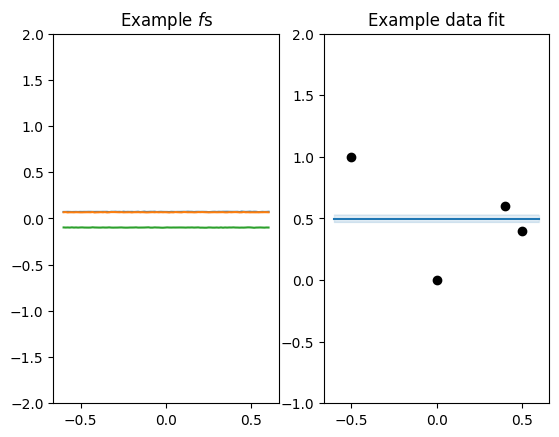

In [3]:
plot_kernel(gpflow.kernels.Constant(variance=0.01))

# Test in GPflow

In [7]:
VFT(2000., *popt_peridotite)

NameError: name 'VFT' is not defined

<Figure size 640x480 with 0 Axes>

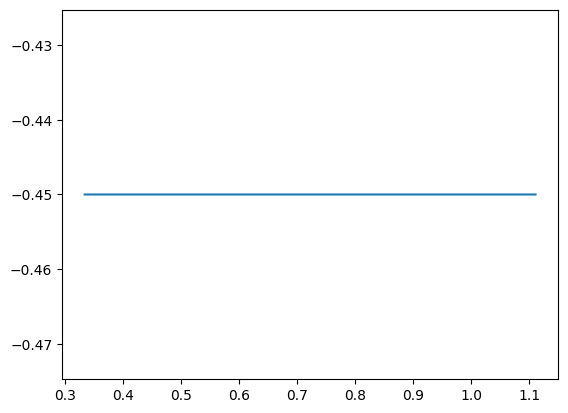

In [91]:
kernel = gpflow.kernels.Polynomial(degree=2, variance=27., offset=0.01) + gpflow.kernels.Matern32(variance=0.00278, lengthscales=3.0)
#kernel = gpflow.kernels.Linear()* gpflow.kernels.Polynomial(2, variance=1.)
#kernel = gpflow.kernels.SquaredExponential(lengthscales=0.3)
mean = gpflow.mean_functions.Constant(-0.45)#gpflow.mean_functions.Polynomial(1)

T_interest = 1000/np.arange(900,3000.,1.).reshape(-1,1)

# without data
plt.figure()
model_prior = gpflow.models.GPR((np.zeros((0, 1)), np.zeros((0, 1))),
                                kernel=deepcopy(kernel), mean_function=mean, noise_variance=1e-3
    )

f_prior_mean, f_prior_var = model_prior.predict_f(T_interest, full_cov=False)
plt.figure()
plt.plot(T_interest, f_prior_mean)

In [92]:
model_prior

name,class,transform,prior,trainable,shape,dtype,value
GPR.mean_function.c,Parameter,Identity,,True,(),float64,-0.45
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,27
GPR.kernel.kernels[0].offset,Parameter,Softplus,,True,(),float64,0.01
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.00278
GPR.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,3
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.001


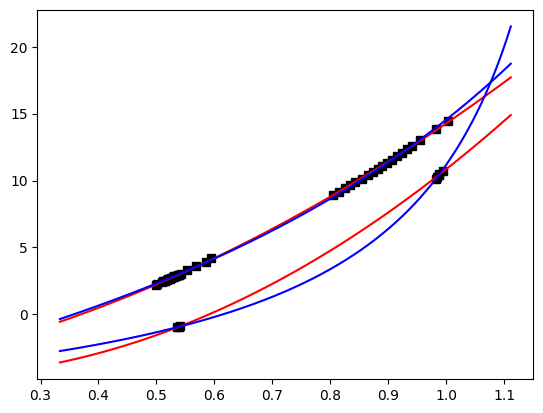

In [93]:
import pandas as pd
data_albite = pd.read_excel("./data/albite_test.xlsx")
data_peridotite = pd.read_excel("./data/albite_test.xlsx", sheet_name="peridotite")

def VFT(x,B,C):
    return -4.5 + B/(x-C)

from scipy.optimize import curve_fit
pinit = [10000, 500]
popt, pcov = curve_fit(VFT, data_albite["T"], data_albite.Y,p0=pinit)
popt_peridotite, pcov_peridotite = curve_fit(VFT, data_peridotite["T"], data_peridotite.Y,p0=pinit)

X_ab = 1000/data_albite["T"].values.reshape(-1,1)
y_ab = data_albite.Y.values.reshape(-1,1)/10

X_pr = 1000/data_peridotite["T"].values.reshape(-1,1)
y_pr = data_peridotite.Y.values.reshape(-1,1)/10

#kernel = gpflow.kernels.Exponential(variance=100)

model_ab = gpflow.models.GPR(
        (X_ab, y_ab), kernel=deepcopy(kernel), mean_function=mean, noise_variance=1e-3
    )

model_pr = gpflow.models.GPR(
        (X_pr, y_pr), kernel=deepcopy(kernel), mean_function=mean, noise_variance=1e-3
    )

#opt = gpflow.optimizers.Scipy()
#opt.minimize(model_ab.training_loss, 
#             model_ab.trainable_variables,
#           options={"disp": 20, "maxiter": 500})


f_ab_mean, f_ab_var = model_ab.predict_f(T_interest, full_cov=False)
f_pr_mean, f_pr_var = model_pr.predict_f(T_interest, full_cov=False)

plt.figure()
plt.plot(1000/data_albite["T"], data_albite["Y"],"ks")
plt.plot(T_interest, f_ab_mean*10,"r-")
#plt.plot(T_interest, abt_predictive_mean*10-1.96*abt_predictive_std*10,"r--")
#plt.plot(T_interest, abt_predictive_mean*10+1.96*abt_predictive_std*10,"r--")
plt.plot(T_interest, VFT(1000/T_interest, *popt),"b-")

plt.plot(1000/data_peridotite["T"], data_peridotite["Y"],"ks")
plt.plot(T_interest, f_pr_mean*10,"r-")
#plt.plot(T_interest, pr_predictive_mean*10-1.96*pr_predictive_std*10,"r--")
#plt.plot(T_interest, pr_predictive_mean*10+1.96*pr_predictive_std*10,"r--")
plt.plot(T_interest, VFT(1000/T_interest, *popt_peridotite),"b-")



In [94]:
model_pr

name,class,transform,prior,trainable,shape,dtype,value
GPR.mean_function.c,Parameter,Identity,,True,(),float64,-0.45
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,27
GPR.kernel.kernels[0].offset,Parameter,Softplus,,True,(),float64,0.01
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.00278
GPR.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,3
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.001


In [56]:
model_ab

name,class,transform,prior,trainable,shape,dtype,value
GPR.mean_function.c,Parameter,Identity,,True,(),float64,-0.23315
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,27.3043
GPR.kernel.kernels[0].offset,Parameter,Softplus,,True,(),float64,0
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.00281
GPR.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,3.09883
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0


In [5]:
popt

array([10601.3890565 ,   443.74383295])

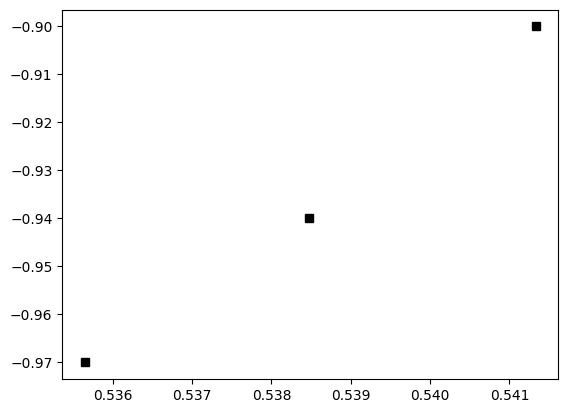

In [11]:
plt.plot(1000/data_peridotite.loc[data_peridotite["Y"]<6,"T"], data_peridotite.loc[data_peridotite["Y"]<6,"Y"],"ks")

In [70]:
data1_ = pd.read_excel("./data/database.xlsx", sheet_name="lp")
data2_ = pd.read_excel("./data/database.xlsx", sheet_name="hp")
data_ = pd.concat((data1_,data2_)).copy()

In [84]:
subset = data_.loc[(data_.sio2>73) & 
                   (data_.sio2<77) & 
                    (data_.al2o3>13) & 
                    (data_.al2o3<14) & (data_.feo==0)& (data_.fe2o3==0)& (data_.cao==0) & (data_.mgo==0)& (data_.k2o==0)].reset_index().copy()
subset

,index,Name,sio2,tio2,al2o3,feo,fe2o3,mno,mgo,cao,...,P,T,viscosity,ref,Name_publi,Date Update,System,LineNumber,Sc,Compo_interest
0,9254,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,0.0,1873.15,2.86,Scarfe and Cronin 1986,Ab,16/10/23,sio2al2o3na2o,9255,NaN,NaN
1,9255,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,0.0,1848.15,3.00,Scarfe and Cronin 1986,Ab,16/10/23,sio2al2o3na2o,9256,NaN,NaN
2,9256,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,0.0,1823.15,3.15,Scarfe and Cronin 1986,Ab,16/10/23,sio2al2o3na2o,9257,NaN,NaN
3,9257,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,0.0,1798.15,3.31,Scarfe and Cronin 1986,Ab,16/10/23,sio2al2o3na2o,9258,NaN,NaN
4,9258,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,0.0,1773.15,3.46,Scarfe and Cronin 1986,Ab,16/10/23,sio2al2o3na2o,9259,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,270,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,7.0,2000.00,-0.55,Mori et al. 2000,0,NaN,NaN,271,NaN,albite
65,310,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,0.8,1873.00,2.65,Dingwell 1987,0,NaN,NaN,311,NaN,NaN
66,323,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,0.4,1673.00,4.02,Persikov 1991,0,NaN,NaN,324,NaN,NaN
67,837,staffmnkmcph_74.7_0_13.3_0_0_0_0_0_12_0_0_0,74.69,0.0,13.29,0.0,0.0,0.0,0.0,0.0,...,1.5,1623.00,3.03,Baker 1996,0,NaN,NaN,838,NaN,NaN


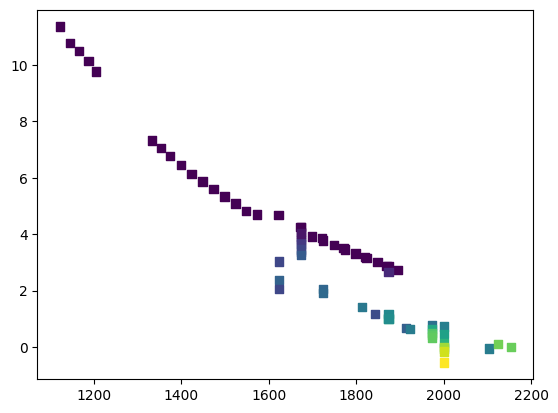

In [85]:
plt.scatter(subset.loc[:,"T"], subset.viscosity,marker="s",c=subset.P)

In [87]:
subset[subset.viscosity>8]

,index,Name,sio2,tio2,al2o3,feo,fe2o3,mno,mgo,cao,...,P,T,viscosity,ref,Name_publi,Date Update,System,LineNumber,Sc,Compo_interest
28,11325,staffmnkmcph_74.7_0_13.5_0_0_0_0_0_11.9_0_0_0,74.68,0.0,13.46,0.0,0.0,0.0,0.0,0.0,...,0.0,1204.45,9.76,Toplis et al. 1997,NAS75:47,16/10/23,sio2al2o3na2o,11326,NaN,NaN
29,11326,staffmnkmcph_74.7_0_13.5_0_0_0_0_0_11.9_0_0_0,74.68,0.0,13.46,0.0,0.0,0.0,0.0,0.0,...,0.0,1187.65,10.14,Toplis et al. 1997,NAS75:47,16/10/23,sio2al2o3na2o,11327,NaN,NaN
30,11327,staffmnkmcph_74.7_0_13.5_0_0_0_0_0_11.9_0_0_0,74.68,0.0,13.46,0.0,0.0,0.0,0.0,0.0,...,0.0,1166.25,10.48,Toplis et al. 1997,NAS75:47,16/10/23,sio2al2o3na2o,11328,NaN,NaN
31,11328,staffmnkmcph_74.7_0_13.5_0_0_0_0_0_11.9_0_0_0,74.68,0.0,13.46,0.0,0.0,0.0,0.0,0.0,...,0.0,1145.35,10.78,Toplis et al. 1997,NAS75:47,16/10/23,sio2al2o3na2o,11329,NaN,NaN
32,11329,staffmnkmcph_74.7_0_13.5_0_0_0_0_0_11.9_0_0_0,74.68,0.0,13.46,0.0,0.0,0.0,0.0,0.0,...,0.0,1121.95,11.36,Toplis et al. 1997,NAS75:47,16/10/23,sio2al2o3na2o,11330,NaN,NaN


# Test in GPjax

In [1]:
# Enable Float64 for more stable matrix inversions.
from jax import config

config.update("jax_enable_x64", True)

from jax import jit
import jax.numpy as jnp
import jax.random as jr
from jaxtyping import install_import_hook
import matplotlib as mpl
import matplotlib.pyplot as plt

with install_import_hook("gpjax", "beartype.beartype"):
    import gpjax as gpx
    
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import joblib

import src.utils as utils

/var/folders/23/p99d2kmd0vlg5qrqb4vq2q840000gn/T/ipykernel_22901/898839591.py:16: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [49]:
data_albite = pd.read_excel("./data/albite_test.xlsx")
data_peridotite = pd.read_excel("./data/albite_test.xlsx", sheet_name="peridotite")

def VFT(x,B,C):
    return -4.5 + B/(x-C)

from scipy.optimize import curve_fit
pinit = [5000, 500]
popt, pcov = curve_fit(VFT, data_albite["T"], data_albite.Y,p0=pinit)
popt_peridotite, pcov_peridotite = curve_fit(VFT, data_peridotite["T"], data_peridotite.Y,p0=pinit)

X_ab = 1000/data_albite["T"].values.reshape(-1,1)
y_ab = data_albite.Y.values.reshape(-1,1)/10

X_pr = 1000/data_peridotite["T"].values.reshape(-1,1)
y_pr = data_peridotite.Y.values.reshape(-1,1)/10

In [80]:
D = gpx.Dataset(X=X_ab, y=y_ab)
D2 = gpx.Dataset(X=X_pr, y=y_pr)

kernel = gpx.kernels.Polynomial(degree=2,variance=1000.)
#kernel = gpx.kernels.Matern32() #+ gpx.kernels.Constant()
meanf = gpx.mean_functions.Constant(jnp.array([-0.450]))
prior = gpx.gps.Prior(mean_function=meanf, kernel=kernel)

likelihood = gpx.likelihoods.Gaussian(num_datapoints=D.n)
posterior = prior * likelihood

# let's have a look at the posterior before training.
T_interest = 1000/np.arange(900,1500.,10.).reshape(-1,1)

latent_dist = posterior.predict(T_interest, train_data=D)
predictive_dist = posterior.likelihood(latent_dist)
abt_predictive_mean = predictive_dist.mean()
abt_predictive_std = predictive_dist.stddev()

latent_dist = posterior.predict(T_interest, train_data=D2)
predictive_dist = posterior.likelihood(latent_dist)
pr_predictive_mean = predictive_dist.mean()
pr_predictive_std = predictive_dist.stddev()

plt.plot(1000/data_albite["T"], data_albite["Y"],"ks")
plt.plot(T_interest, abt_predictive_mean*10,"r-")
#plt.plot(T_interest, abt_predictive_mean*10-1.96*abt_predictive_std*10,"r--")
#plt.plot(T_interest, abt_predictive_mean*10+1.96*abt_predictive_std*10,"r--")
plt.plot(T_interest, VFT(1000/T_interest, *popt),"b-")

plt.plot(1000/data_peridotite["T"], data_peridotite["Y"],"ks")
plt.plot(T_interest, pr_predictive_mean*10,"r-")
#plt.plot(T_interest, pr_predictive_mean*10-1.96*pr_predictive_std*10,"r--")
#plt.plot(T_interest, pr_predictive_mean*10+1.96*pr_predictive_std*10,"r--")
plt.plot(T_interest, VFT(1000/T_interest, *popt_peridotite),"b-")



AttributeError: module 'gpjax.mean_functions' has no attribute 'Polynomial'

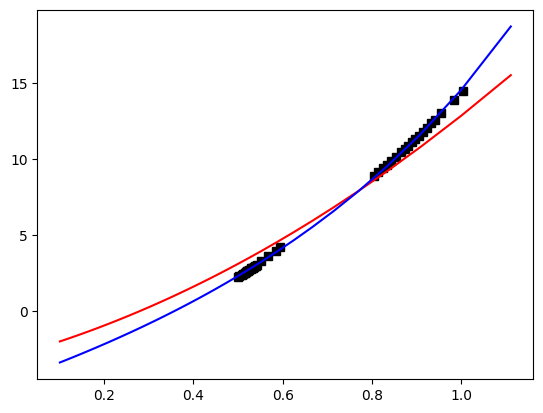

In [24]:
negative_mll = gpx.objectives.ConjugateMLL(negative=True)
negative_mll(posterior, train_data=D)

Array(43.1100457, dtype=float64)

In [9]:
negative_mll = jit(negative_mll)

In [10]:
opt_posterior, history = gpx.fit_scipy(
    model=posterior,
    objective=negative_mll,
    train_data=D,
    max_iters=100000
)

Initial loss is 42.536987864290886
Optimization was successful
Final loss is -177.98197027002857 after 55 iterations
